# Preparação dos dados

### Carregando e analisando atributos do dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [4]:
df.shape

(12283, 12)

In [6]:
#Usuários únicos
len(df.fullVisitorId.unique())

9996

In [8]:
df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [12]:
#Transformando os dados em formatos errados para objeto
df = pd.read_csv('train.csv', dtype = {'date': object, 'fullVisitorId': object, 'visitId': object})

In [13]:
#Transformando dados em formato string para dicionário
#Depois convertendo em colunas
import json

pd.DataFrame([json.loads(linha) for linha in df.device])

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12279,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
12280,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12281,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


In [14]:
dicionarios = ['device', 'geoNetwork', 'trafficSource', 'totals']

In [16]:
for coluna in dicionarios:
    df = df.join(pd.DataFrame([json.loads(linha) for linha in df[coluna]]))

In [17]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,...,NaN,NaN,NaN,NaN,1,5,4,NaN,1,NaN


In [18]:
df.drop(dicionarios, axis=1, inplace=True)

In [19]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,Not Socially Engaged,1472829671,1,1472829671,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,5,4,NaN,1,NaN


### Limpando o dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   channelGrouping            12283 non-null  object
 1   date                       12283 non-null  object
 2   fullVisitorId              12283 non-null  object
 3   sessionId                  12283 non-null  object
 4   socialEngagementType       12283 non-null  object
 5   visitId                    12283 non-null  object
 6   visitNumber                12283 non-null  int64 
 7   visitStartTime             12283 non-null  int64 
 8   browser                    12283 non-null  object
 9   browserVersion             12283 non-null  object
 10  browserSize                12283 non-null  object
 11  operatingSystem            12283 non-null  object
 12  operatingSystemVersion     12283 non-null  object
 13  isMobile                   12283 non-null  bool  
 14  mobile

In [25]:
#Coluna com valor indisponivel do usuario, protegido pelo google
df.drop('adwordsClickInfo', axis=1, inplace=True)

In [27]:
coluna_na = []
for coluna in df.columns:
    print(coluna + ': ' + str(len(df[coluna].unique())))
    #Colunas que só tem um valor na coluna para remover posteriormente, pois não traz nenhuma informação
    if len(df[coluna].unique()) == 1:
        coluna_na.append(coluna)

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserVersion: 1
browserSize: 1
operatingSystem: 12
operatingSystemVersion: 1
isMobile: 2
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
cityId: 1
networkDomain: 1747
latitude: 1
longitude: 1
networkLocation: 1
campaign: 7
source: 76
medium: 7
keyword: 129
isTrueDirect: 2
referralPath: 198
adContent: 16
campaignCode: 2
visits: 1
hits: 96
pageviews: 75
bounces: 2
newVisits: 2
transactionRevenue: 147


In [28]:
#Removendo colunas com um único valor
df.drop(coluna_na, axis=1, inplace=True)


### Corrigindo variáveis quantitativas

In [31]:
quant = ['bounces', 'hits', 'pageviews', 'newVisits', 'transactionRevenue']

In [32]:
for coluna in quant:
    df[coluna] = pd.to_numeric(df[coluna])

In [35]:
df.dtypes

channelGrouping        object
date                   object
fullVisitorId          object
sessionId              object
visitId                object
visitNumber             int64
visitStartTime          int64
browser                object
operatingSystem        object
isMobile                 bool
deviceCategory         object
continent              object
subContinent           object
country                object
region                 object
metro                  object
city                   object
networkDomain          object
campaign               object
source                 object
medium                 object
keyword                object
isTrueDirect           object
referralPath           object
adContent              object
campaignCode           object
hits                    int64
pageviews               int64
bounces               float64
newVisits             float64
transactionRevenue    float64
dtype: object

In [36]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,NaN


### Tratando variável resposta

In [39]:
df.transactionRevenue.value_counts()

13590000.0     3
19190000.0     3
33590000.0     3
31490000.0     2
69990000.0     2
              ..
22490000.0     1
74850000.0     1
32490000.0     1
239880000.0    1
25240000.0     1
Name: transactionRevenue, Length: 146, dtype: int64

In [40]:
df.transactionRevenue.isna().sum()

12119

In [41]:
#Substituindo quando nao tem informação do quanto os usuarios gastaram por zero
df.transactionRevenue.fillna(0, inplace=True)

In [42]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,0.0


In [43]:
#Convertendo para o formato real
#visto que todo o valor que entra, o Google multiplica por um milhão.
df.transactionRevenue = df.transactionRevenue / 1000000

In [44]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,0.0


### Criando dataFrame com as variáveis quantitativas

In [46]:
df_quant = df.groupby('fullVisitorId', as_index=False)[quant].sum()
df_quant.head()

,fullVisitorId,bounces,hits,pageviews,newVisits,transactionRevenue
0,0002365800130207040,1.0,1,1,1.0,0.0
1,0010286039787739137,0.0,4,3,1.0,0.0
2,0011056874471185769,0.0,2,2,1.0,0.0
3,0014443856125569702,1.0,1,1,1.0,0.0
4,0017260116665815114,0.0,2,2,0.0,0.0


In [47]:
df_quant.shape

(9997, 6)

### Treinando o modelo

In [51]:
#Separando variaveis dependentes e independentes
X = df_quant.drop('transactionRevenue', axis=1)
y = df_quant.transactionRevenue.copy()

In [52]:
#Separando dados de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
#Treinando com um modelo de regressão linear
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [54]:
reg.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred_reg = reg.predict(X_test)

### Avaliando os resultados

In [57]:
resultados_reg = pd.DataFrame()

resultados_reg['revenue'] = y_test
resultados_reg['predict'] = y_pred_reg
resultados_reg['erro'] = y_pred_reg - y_test

In [60]:
resultados_reg

,revenue,predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655
...,...,...,...
5580,0.0,1.468371,1.468371
1074,0.0,1.723133,1.723133
3063,0.0,1.613110,1.613110
4554,0.0,1.526790,1.526790


In [61]:
#Está gerando erros altos
#E as predições estão tendo um certo padrão
resultados_reg[resultados_reg['revenue'] > 0]

,revenue,predict,erro
3006,32.49,1.616211,-30.873789
5928,74.85,1.449755,-73.400245
8361,424.50,1.306194,-423.193806
8612,55.99,1.291322,-54.698678
416,15.19,1.831725,-13.358275
4077,5.97,1.554336,-4.415664
8146,27.19,1.318915,-25.871085
4908,372.65,1.505642,-371.144358
9395,29.98,1.779852,-28.200148
8728,101.95,1.284318,-100.665682


### MSE

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
mean_squared_error(y_test, y_pred_reg)

807.2459296820928

### RMSE

In [65]:
import numpy as np

In [66]:
np.sqrt(mean_squared_error(y_test, y_pred_reg))

28.412073660366516

In [70]:
#Avaliando média
np.mean(df_quant.transactionRevenue)

1.778953686105832

In [69]:
#Avaliando esvio padrão
#Nosso modelo está errando mais do que o desvio natural da nossa base.
np.std(df_quant.transactionRevenue)

25.129905708016967

### Gráfico

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

c:\users\thayanne\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

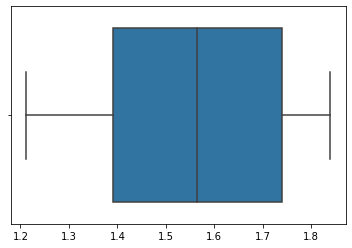

In [74]:
sns.boxplot(y_pred_reg)

c:\users\thayanne\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='transactionRevenue'>

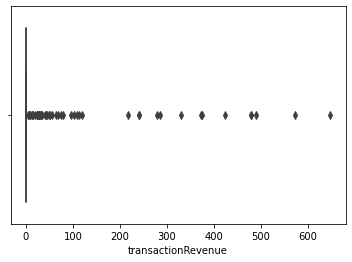

In [75]:
sns.boxplot(y_test)

c:\users\thayanne\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='transactionRevenue', ylabel='Density'>

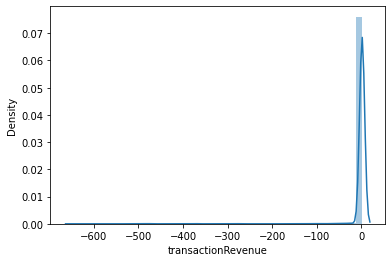

In [76]:
sns.distplot(y_pred_reg - y_test)